<a href="https://colab.research.google.com/github/AmirSaba/Score_attribution-for-visa-premier/blob/main/VisaPremier_Pret_6_7_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data set Carte Visa premier
## Prétraitements 6, 7 et 8

### Import

In [ ]:
import plotly.graph_objects as go
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix,ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
from matplotlib import gridspec
from numpy import nan
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
import plotly.graph_objects as go
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix,ConfusionMatrixDisplay
import plotly.express as px
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score,auc,precision_recall_curve
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')


### Chargement des données

In [ ]:
pd.set_option('display.max_columns', None)
df=pd.read_csv('VisaPremier.txt', sep="\t")

### Suppression des variables contenant des missing values et des variables qualitative

In [ ]:
df=df.drop(['matricul','codeqlt', 'cartevp','sexe','csp','nbpaiecb','agemvt','sitfamil','departem'],axis=1)
df

,ptvente,age,anciente,nbimpaye,mtrejet,nbopguic,moycred3,aveparmo,endette,engagemt,engagemc,engagemm,nbcptvue,moysold3,moycredi,nbop,mtfactur,engageml,nbvie,mtvie,nbeparmo,mteparmo,nbeparlo,mteparlo,nblivret,mtlivret,nbeparlt,mteparlt,nbeparte,mteparte,nbbon,mtbon,nbcb,nbcbptar,avtscpte,aveparfi,sexer,cartevpr,nbjdebit
0,1,51,238,0,0,0,115,701939,4,119216,0,119216,2,35938,114,49,206016,0,1,152530,4,701939,2,520145,2,181794,0,0,0,0,0,0,2,0,1303700,556967,0,1,1
1,6,52,270,0,0,4,19579,8920,0,0,0,0,1,132468,4079,50,98500,0,0,0,3,19508920,2,8920,0,0,0,0,0,0,1,19500000,2,0,19856243,133896,0,1,0
2,1,58,139,0,0,0,40,3402,0,0,0,0,1,1336,40,2,3394,0,0,0,1,3402,0,0,1,3402,0,0,0,0,0,0,1,0,122745,0,0,1,0
3,1,27,99,0,0,0,17,76321,0,0,0,0,1,12221,17,23,0,0,0,0,3,76321,1,46312,2,30009,0,0,0,0,0,0,2,0,83224,0,0,1,0
4,1,49,89,0,0,0,374,473350,0,209062,37859,171203,1,21187,208,49,0,0,1,21423,5,473350,3,399999,2,73351,0,0,0,0,0,0,3,1,494773,21423,0,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,1,38,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1069,1,43,27,0,0,0,0,10685,0,0,0,0,0,0,0,0,0,0,0,0,1,10685,1,10685,0,0,0,0,0,0,0,0,0,0,10685,0,1,0,0
1070,1,49,31,0,0,4,14,55845,0,0,0,0,1,2711,14,51,13900,0,0,0,1,55845,1,55845,0,0,0,0,0,0,0,0,1,0,63336,0,1,0,9
1071,3,27,192,0,0,2,8,24642,0,0,0,0,1,1622,8,25,22000,0,0,0,1,24642,1,24642,0,0,0,0,0,0,0,0,1,0,27897,0,1,0,38


### Preprocessing

In [ ]:
columns=df.columns
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.columns=columns
df

,ptvente,age,anciente,nbimpaye,mtrejet,nbopguic,moycred3,aveparmo,endette,engagemt,engagemc,engagemm,nbcptvue,moysold3,moycredi,nbop,mtfactur,engageml,nbvie,mtvie,nbeparmo,mteparmo,nbeparlo,mteparlo,nblivret,mtlivret,nbeparlt,mteparlt,nbeparte,mteparte,nbbon,mtbon,nbcb,nbcbptar,avtscpte,aveparfi,sexer,cartevpr,nbjdebit
0,0.000000,0.702128,0.272727,0.0,1.0,0.000000,0.005874,0.723648,0.040404,0.034327,0.0000,0.073670,0.50,0.339839,0.027948,0.187023,0.154721,0.0,0.076923,0.027989,0.444444,0.035980,0.50,0.897416,0.50,0.187416,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.00,0.065657,0.078817,0.0,1.0,0.007463
1,0.833333,0.723404,0.309551,0.0,1.0,0.142857,1.000000,0.009196,0.000000,0.000000,0.0000,0.000000,0.25,0.649352,1.000000,0.190840,0.073975,0.0,0.000000,0.000000,0.333333,1.000000,0.50,0.015390,0.00,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.4,0.00,1.000000,0.018948,0.0,1.0,0.000000
2,0.000000,0.851064,0.158803,0.0,1.0,0.000000,0.002043,0.003507,0.000000,0.000000,0.0000,0.000000,0.25,0.228892,0.009806,0.007634,0.002549,0.0,0.000000,0.000000,0.111111,0.000174,0.00,0.000000,0.25,0.003507,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.00,0.006182,0.000000,0.0,1.0,0.000000
3,0.000000,0.191489,0.112773,0.0,1.0,0.000000,0.000868,0.078681,0.000000,0.000000,0.0000,0.000000,0.25,0.263793,0.004168,0.087786,0.000000,0.0,0.000000,0.000000,0.333333,0.003912,0.25,0.079903,0.50,0.030937,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.00,0.004191,0.000000,0.0,1.0,0.000000
4,0.000000,0.659574,0.101266,0.0,1.0,0.000000,0.019102,0.487990,0.000000,0.060197,0.0756,0.105796,0.25,0.292542,0.050993,0.187023,0.000000,0.0,0.076923,0.003931,0.555556,0.024263,0.75,0.690126,0.50,0.075620,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.25,0.024918,0.003032,0.0,1.0,0.111940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,0.000000,0.425532,0.025316,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00,0.224608,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.111111,0.000000,0.25,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.000000,1.0,0.0,0.000000
1069,0.000000,0.531915,0.029919,0.0,1.0,0.000000,0.000000,0.011015,0.000000,0.000000,0.0000,0.000000,0.00,0.224608,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.111111,0.000548,0.25,0.018435,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000538,0.000000,1.0,0.0,0.000000
1070,0.000000,0.659574,0.034522,0.0,1.0,0.142857,0.000715,0.057572,0.000000,0.000000,0.0000,0.000000,0.25,0.233300,0.003432,0.194656,0.010439,0.0,0.000000,0.000000,0.111111,0.002863,0.25,0.096350,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.00,0.003190,0.000000,1.0,0.0,0.067164
1071,0.333333,0.191489,0.219793,0.0,1.0,0.071429,0.000409,0.025404,0.000000,0.000000,0.0000,0.000000,0.25,0.229809,0.001961,0.095420,0.016522,0.0,0.000000,0.000000,0.111111,0.001263,0.25,0.042515,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.00,0.001405,0.000000,1.0,0.0,0.283582


In [ ]:
cc = df["cartevpr"].value_counts()
cc

0.0    714
1.0    359
Name: cartevpr, dtype: int64

<BarContainer object of 2 artists>

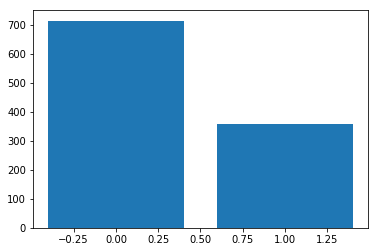

In [ ]:
plt.bar(x=cc.index, height = cc)

In [ ]:
y = df.iloc[:,37:38]
df=df.drop(["cartevpr"],axis=1)
X = df.iloc[:,0:37]
X

,ptvente,age,anciente,nbimpaye,mtrejet,nbopguic,moycred3,aveparmo,endette,engagemt,engagemc,engagemm,nbcptvue,moysold3,moycredi,nbop,mtfactur,engageml,nbvie,mtvie,nbeparmo,mteparmo,nbeparlo,mteparlo,nblivret,mtlivret,nbeparlt,mteparlt,nbeparte,mteparte,nbbon,mtbon,nbcb,nbcbptar,avtscpte,aveparfi,sexer
0,0.000000,0.702128,0.272727,0.0,1.0,0.000000,0.005874,0.723648,0.040404,0.034327,0.0000,0.073670,0.50,0.339839,0.027948,0.187023,0.154721,0.0,0.076923,0.027989,0.444444,0.035980,0.50,0.897416,0.50,0.187416,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.00,0.065657,0.078817,0.0
1,0.833333,0.723404,0.309551,0.0,1.0,0.142857,1.000000,0.009196,0.000000,0.000000,0.0000,0.000000,0.25,0.649352,1.000000,0.190840,0.073975,0.0,0.000000,0.000000,0.333333,1.000000,0.50,0.015390,0.00,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.4,0.00,1.000000,0.018948,0.0
2,0.000000,0.851064,0.158803,0.0,1.0,0.000000,0.002043,0.003507,0.000000,0.000000,0.0000,0.000000,0.25,0.228892,0.009806,0.007634,0.002549,0.0,0.000000,0.000000,0.111111,0.000174,0.00,0.000000,0.25,0.003507,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.00,0.006182,0.000000,0.0
3,0.000000,0.191489,0.112773,0.0,1.0,0.000000,0.000868,0.078681,0.000000,0.000000,0.0000,0.000000,0.25,0.263793,0.004168,0.087786,0.000000,0.0,0.000000,0.000000,0.333333,0.003912,0.25,0.079903,0.50,0.030937,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.00,0.004191,0.000000,0.0
4,0.000000,0.659574,0.101266,0.0,1.0,0.000000,0.019102,0.487990,0.000000,0.060197,0.0756,0.105796,0.25,0.292542,0.050993,0.187023,0.000000,0.0,0.076923,0.003931,0.555556,0.024263,0.75,0.690126,0.50,0.075620,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.25,0.024918,0.003032,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,0.000000,0.425532,0.025316,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00,0.224608,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.111111,0.000000,0.25,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.000000,1.0
1069,0.000000,0.531915,0.029919,0.0,1.0,0.000000,0.000000,0.011015,0.000000,0.000000,0.0000,0.000000,0.00,0.224608,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.111111,0.000548,0.25,0.018435,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000538,0.000000,1.0
1070,0.000000,0.659574,0.034522,0.0,1.0,0.142857,0.000715,0.057572,0.000000,0.000000,0.0000,0.000000,0.25,0.233300,0.003432,0.194656,0.010439,0.0,0.000000,0.000000,0.111111,0.002863,0.25,0.096350,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.00,0.003190,0.000000,1.0
1071,0.333333,0.191489,0.219793,0.0,1.0,0.071429,0.000409,0.025404,0.000000,0.000000,0.0000,0.000000,0.25,0.229809,0.001961,0.095420,0.016522,0.0,0.000000,0.000000,0.111111,0.001263,0.25,0.042515,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.00,0.001405,0.000000,1.0


In [ ]:
validation_size = 0.30
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=validation_size, random_state=seed)

In [ ]:
num_folds = 10
seed = 7
scoring = 'f1'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC(probability=True)))
models.append(('SVM_LIN', SVC(kernel="linear", probability = True)))
models.append(('SVM_POLY', SVC(kernel="poly",probability=True)))
models.append(('SVM_RBF', SVC(kernel="rbf",probability=True)))
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
	cv_results = cross_val_score(model, X_train, np.ravel(Y_train), cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)



LR: 0.667628 (0.066841)
LDA: 0.707640 (0.070228)
QDA: 0.492620 (0.166569)
KNN: 0.579613 (0.077529)
CART: 0.660453 (0.118131)
RF: 0.774674 (0.061222)
NB: 0.424506 (0.137657)
SVM_LIN: 0.696677 (0.065670)
SVM_POLY: 0.696501 (0.050725)
SVM_RBF: 0.689307 (0.062840)


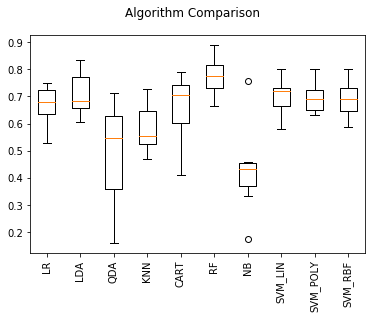

In [ ]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=90)
plt.show()

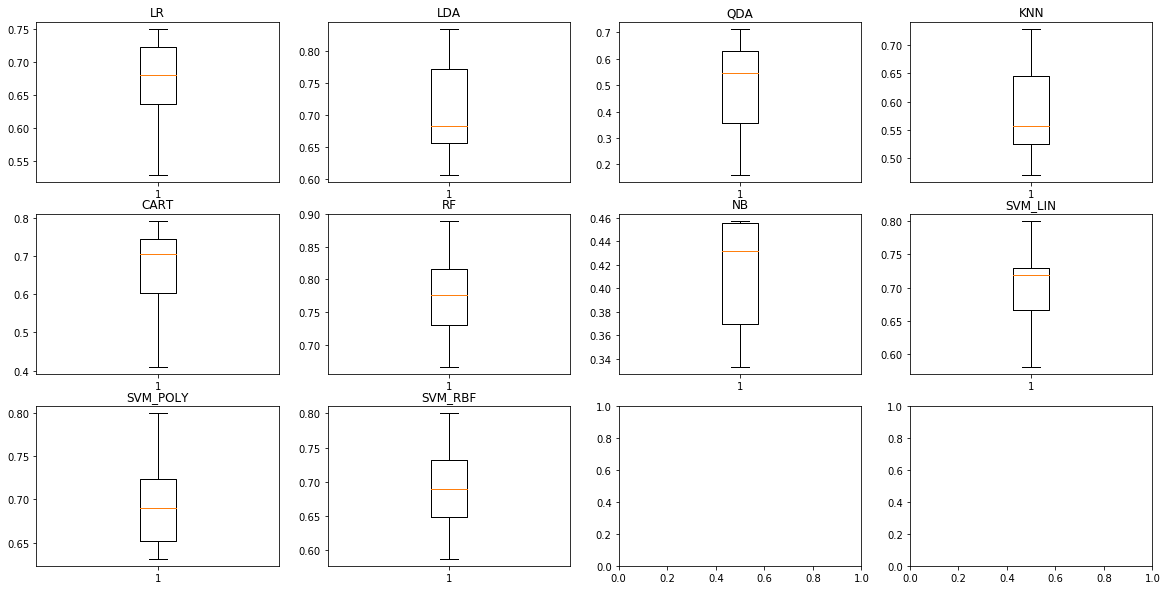

In [ ]:
NB_COL = 4
NB_LIG = 3
fig, axs = plt.subplots(NB_LIG, NB_COL, figsize=(20, 10))
for i in range(len(results)):
    axs[i//NB_COL, i%NB_COL].boxplot(results[i], showfliers=False)
    axs[i//NB_COL, i%NB_COL].set_title(names[i])

In [ ]:
for name, model in models:
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_validation)
    pred_prob = model.predict_proba(X_validation)
    precision, recall, thresholds = precision_recall_curve(Y_validation, pred_prob[:,1])
    print(name," :",accuracy_score(Y_validation, y_pred)," ",f1_score(Y_validation, y_pred, average='macro')," ",auc(recall, precision))


LR  : 0.8354037267080745   0.7977075258110783   0.8224870355434937
LDA  : 0.8509316770186336   0.8161838161838162   0.8475031296809283
QDA  : 0.7484472049689441   0.6322490588384586   0.7214732006218322
KNN  : 0.7577639751552795   0.6859243697478992   0.6933560896678057
CART  : 0.7546583850931677   0.709462623493804   0.6739617637802742
RF  : 0.8975155279503105   0.8813042458362657   0.8952042210670151
NB  : 0.7639751552795031   0.6697435897435897   0.7366457303784208
SVM_LIN  : 0.84472049689441   0.8085248085248086   0.8502868653041415
SVM_POLY  : 0.8229813664596274   0.7794918003243827   0.8527344728905045
SVM_RBF  : 0.8385093167701864   0.8046845837999254   0.844601242444881


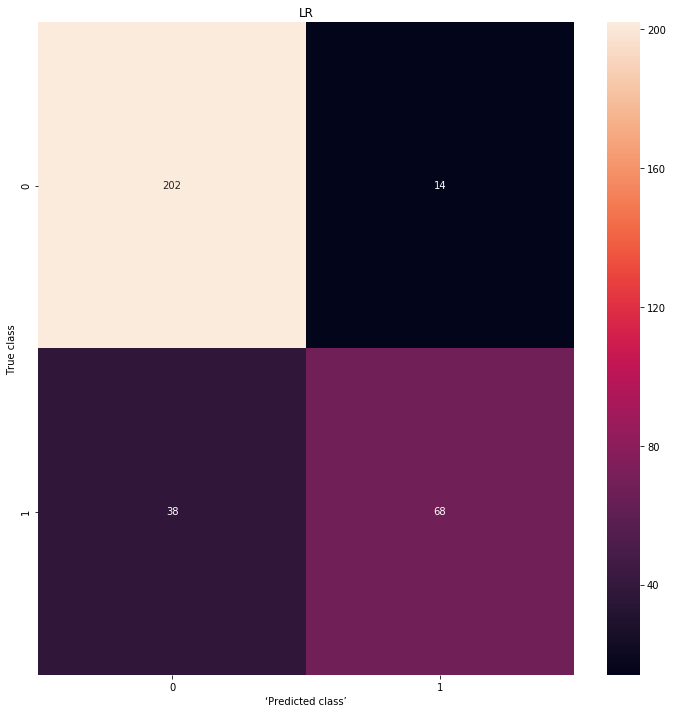

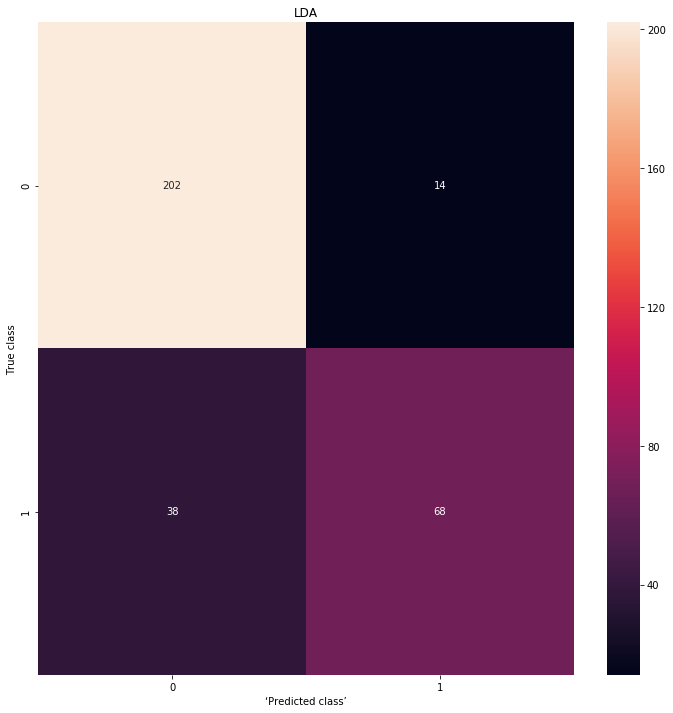

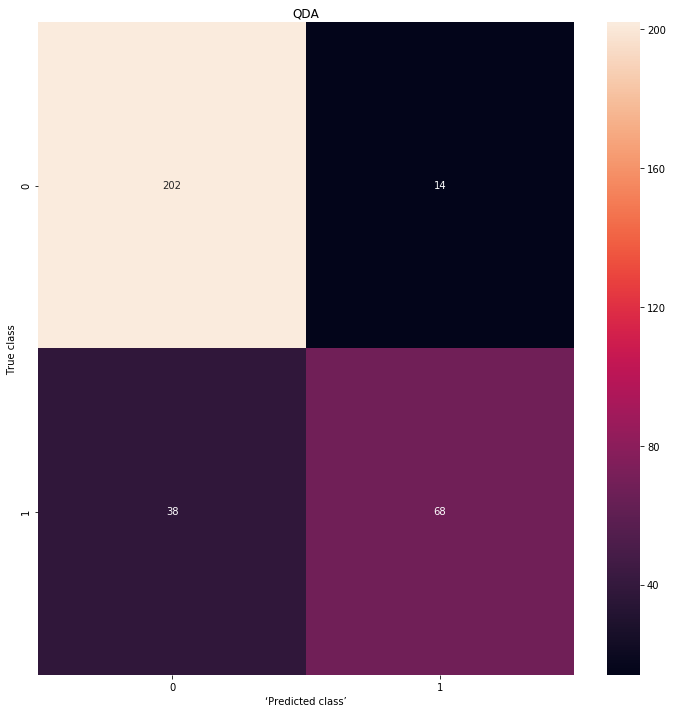

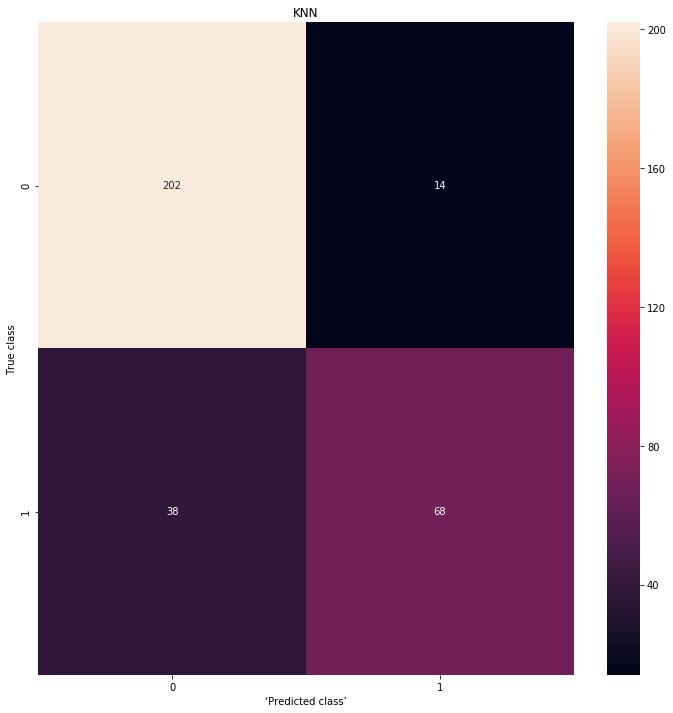

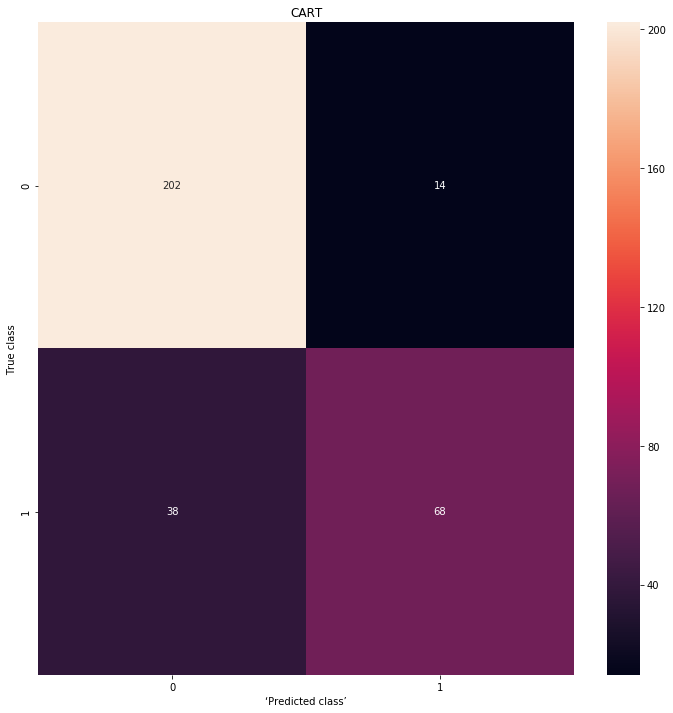

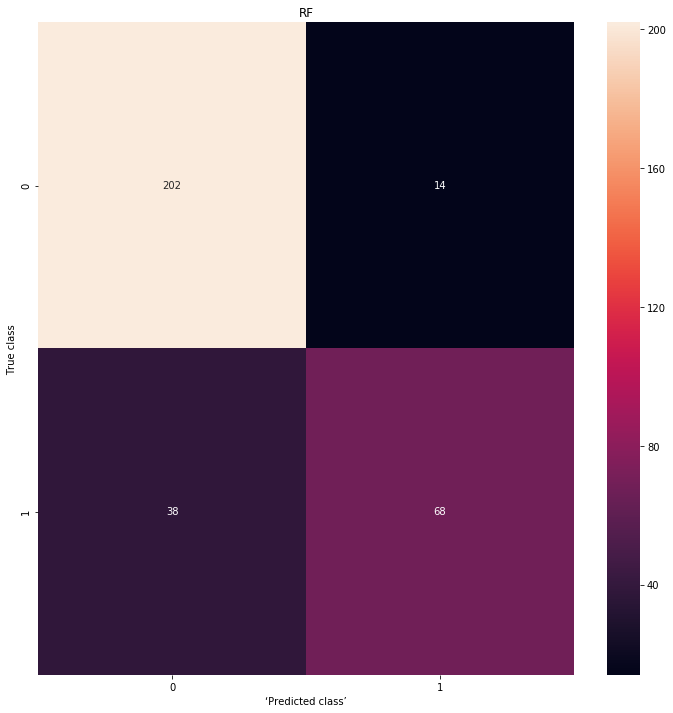

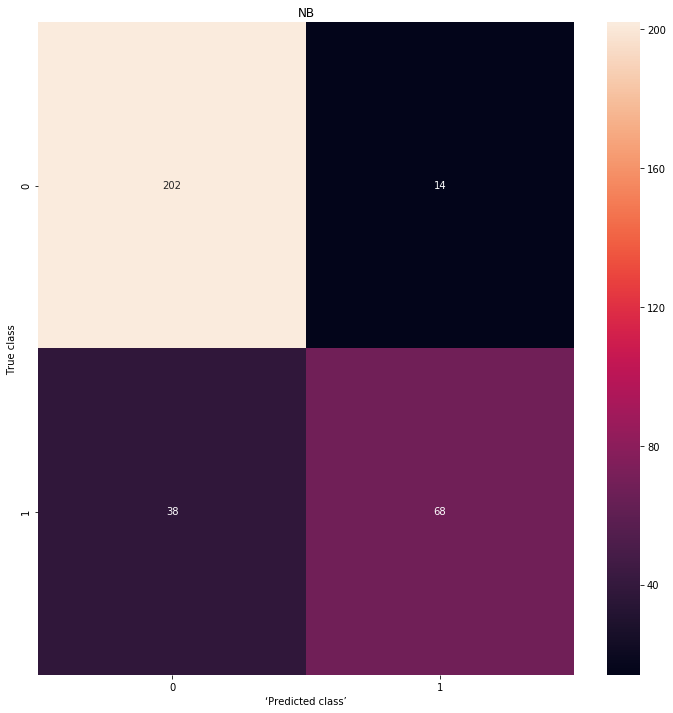

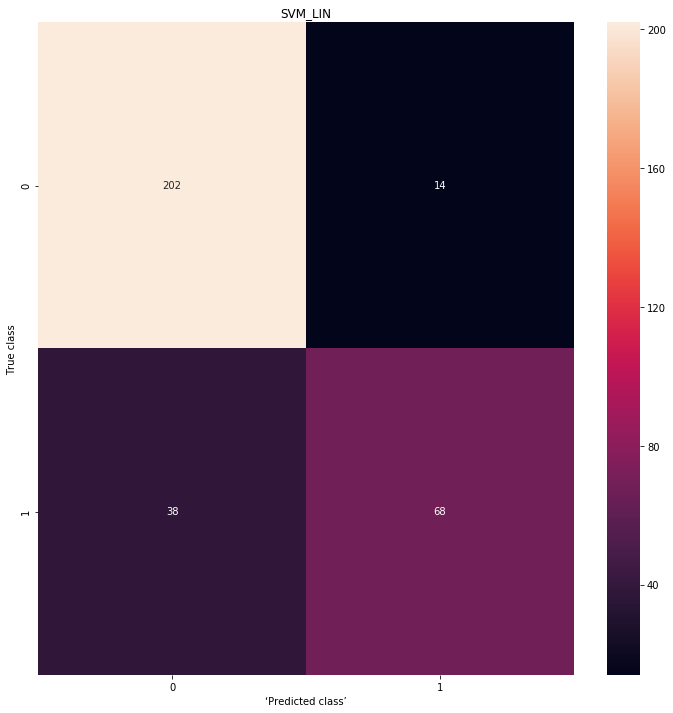

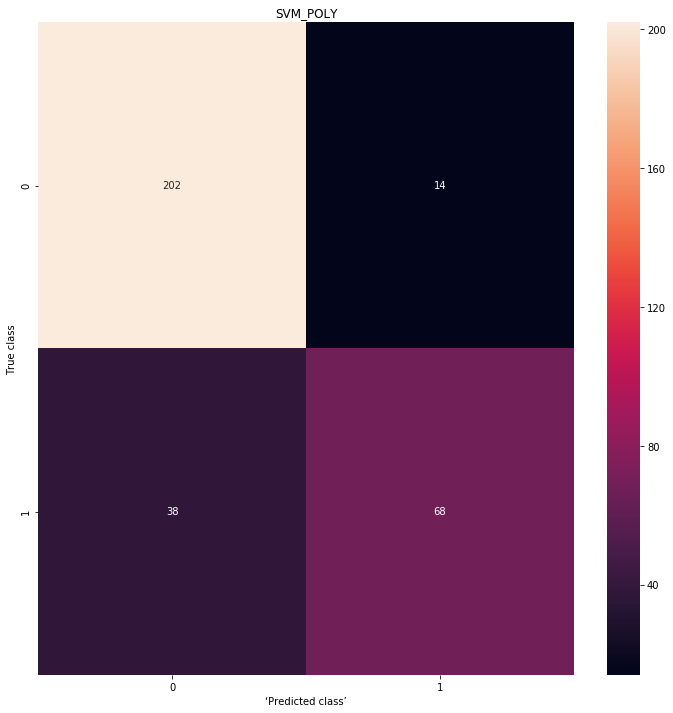

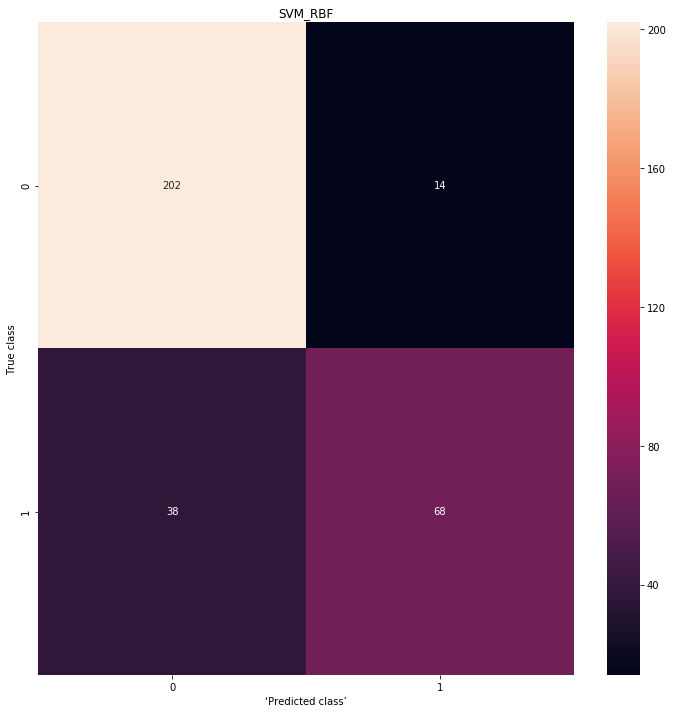

In [ ]:
for name, model in models:
    conf_matrix = confusion_matrix(Y_validation, y_pred)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix,annot=True, fmt="d");
    plt.title(name)
    plt.ylabel("True class")
    plt.xlabel("‘Predicted class’")
    plt.show()


### Balanced Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler(sampling_strategy='minority')
X_new, y_new = os.fit_sample(X_train, Y_train)

In [ ]:
num_folds = 10
seed = 7
scoring = 'f1'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC(probability=True)))
models.append(('SVM_LIN', SVC(kernel="linear", probability=True)))
models.append(('SVM_POLY', SVC(kernel="poly",probability=True)))
models.append(('SVM_RBF', SVC(kernel="rbf",probability=True)))
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
	cv_results = cross_val_score(model, X_new, np.ravel(y_new), cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.811163 (0.033359)
LDA: 0.823458 (0.034910)
QDA: 0.527696 (0.103458)
KNN: 0.790706 (0.039491)
CART: 0.868302 (0.025088)
RF: 0.912965 (0.024779)
NB: 0.430246 (0.057173)
SVM_LIN: 0.834342 (0.032523)
SVM_POLY: 0.830875 (0.026793)
SVM_RBF: 0.836804 (0.029089)


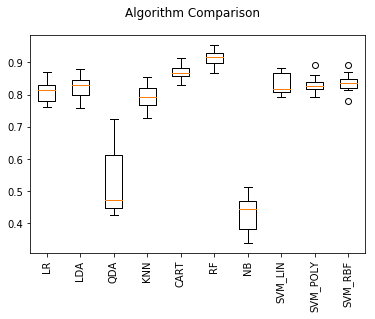

In [ ]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=90)
plt.show()

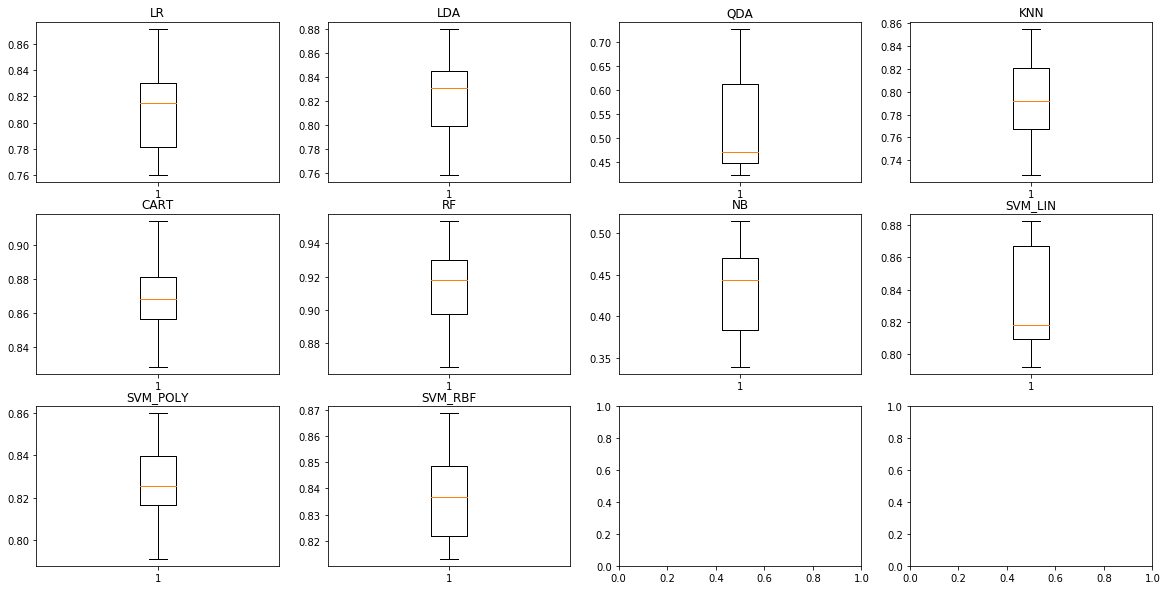

In [ ]:
NB_COL = 4
NB_LIG = 3
fig, axs = plt.subplots(NB_LIG, NB_COL, figsize=(20, 10))
for i in range(len(results)):
    axs[i//NB_COL, i%NB_COL].boxplot(results[i], showfliers=False)
    axs[i//NB_COL, i%NB_COL].set_title(names[i])

In [ ]:
for name, model in models:
    model.fit(X_new, y_new)
    y_pred = model.predict(X_validation)
    pred_prob = model.predict_proba(X_validation)
    precision, recall, thresholds = precision_recall_curve(Y_validation, pred_prob[:,1])
    print(name," :",accuracy_score(Y_validation, y_pred)," ",f1_score(Y_validation, y_pred, average='macro')," ",auc(recall, precision))


LR  : 0.8478260869565217   0.8297197250132206   0.8228361164121174
LDA  : 0.860248447204969   0.8414018804111073   0.8401217650016651
QDA  : 0.7577639751552795   0.6545634593167189   0.7193312233572272
KNN  : 0.7577639751552795   0.7244239631336404   0.7024100206702536
CART  : 0.7888198757763976   0.752049644426326   0.723529239423415
RF  : 0.8695652173913043   0.8501130469477325   0.8850567975515604
NB  : 0.7670807453416149   0.672564571893431   0.7486992997180874
SVM_LIN  : 0.8416149068322981   0.8235616438356165   0.8368258743677395
SVM_POLY  : 0.8571428571428571   0.8397802007615092   0.8399082005500509
SVM_RBF  : 0.84472049689441   0.827401372212693   0.8325156169571806


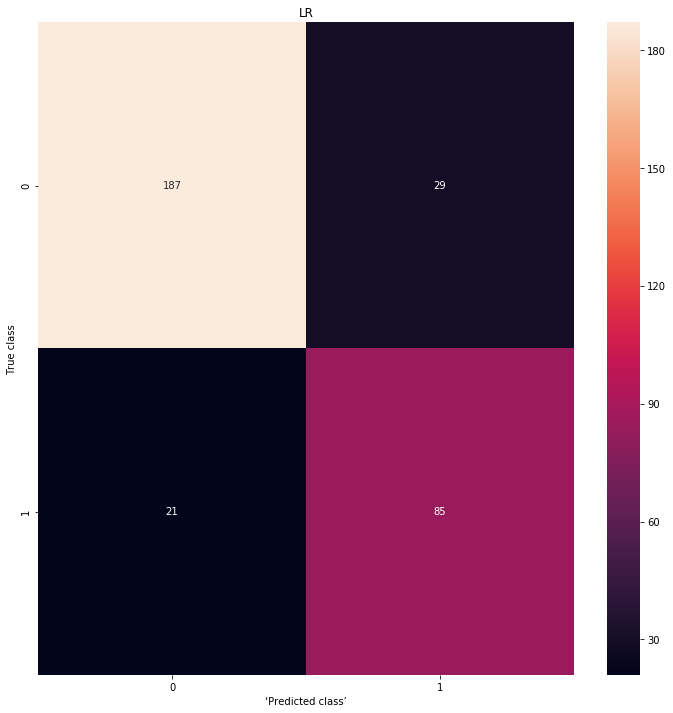

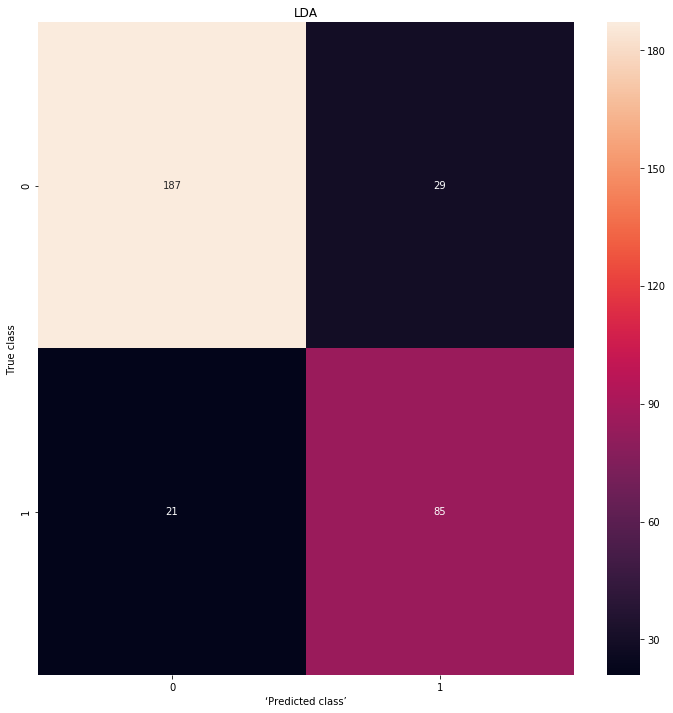

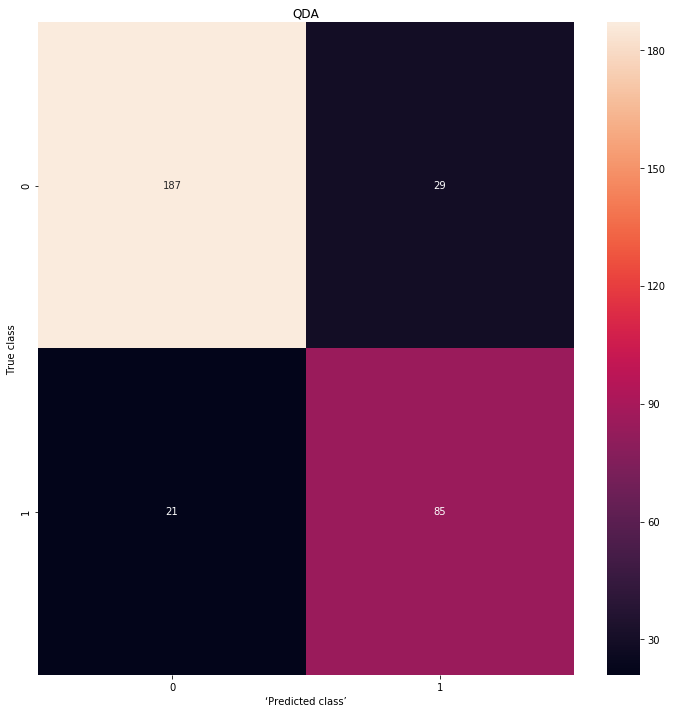

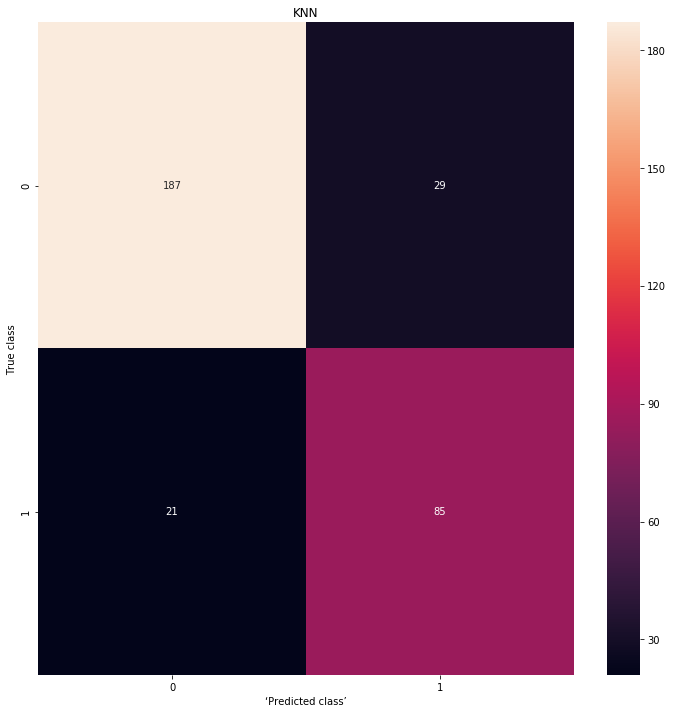

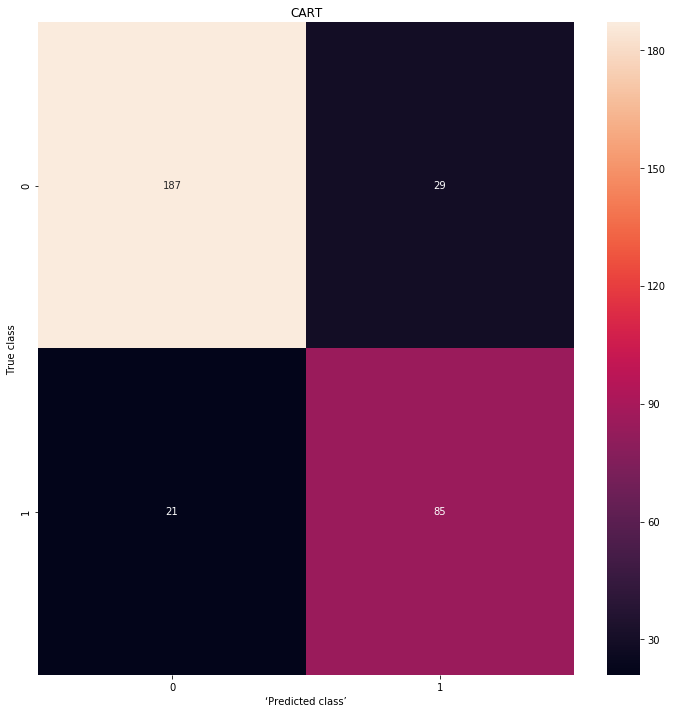

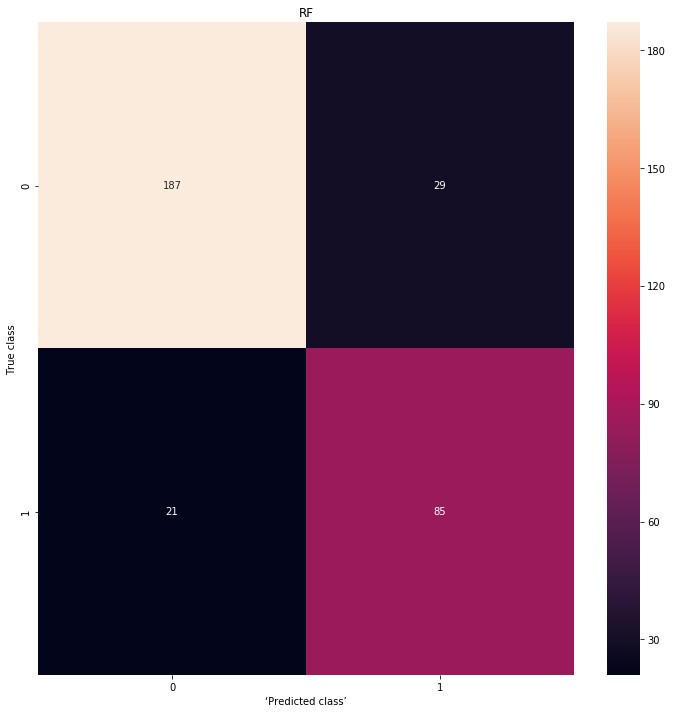

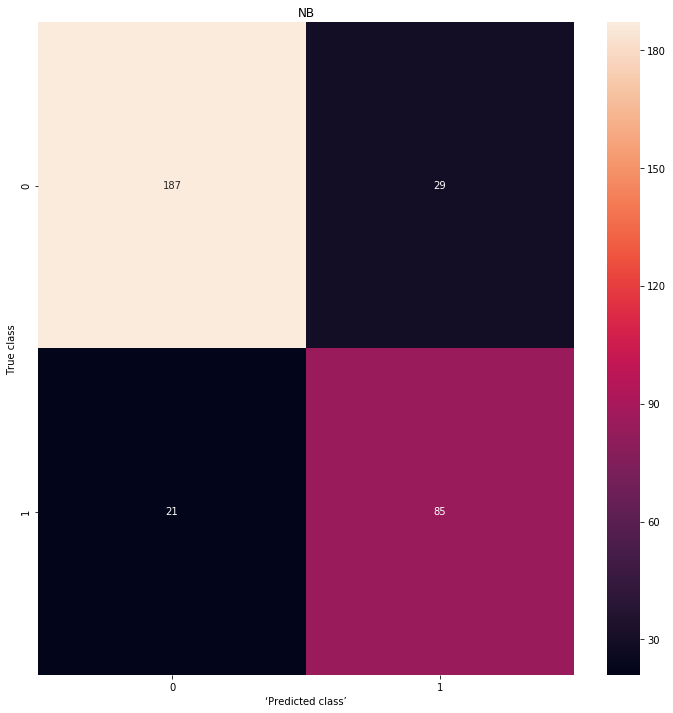

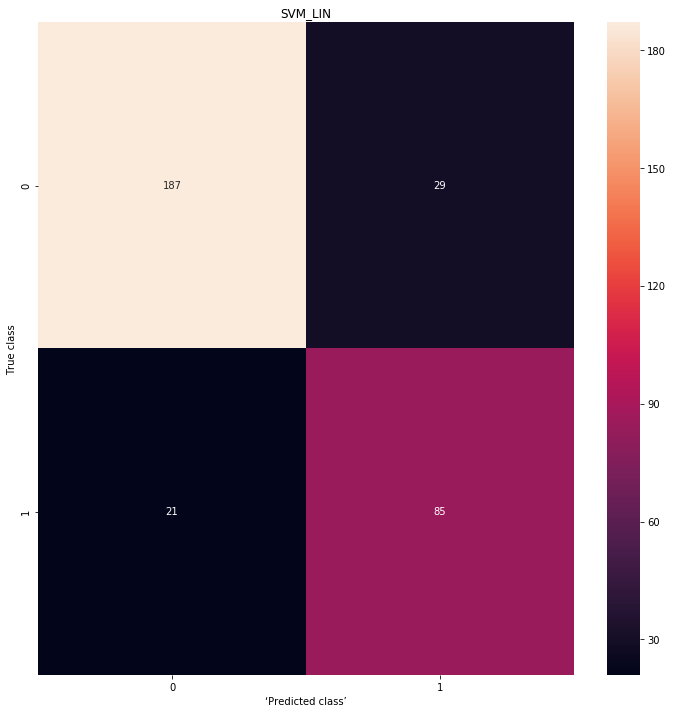

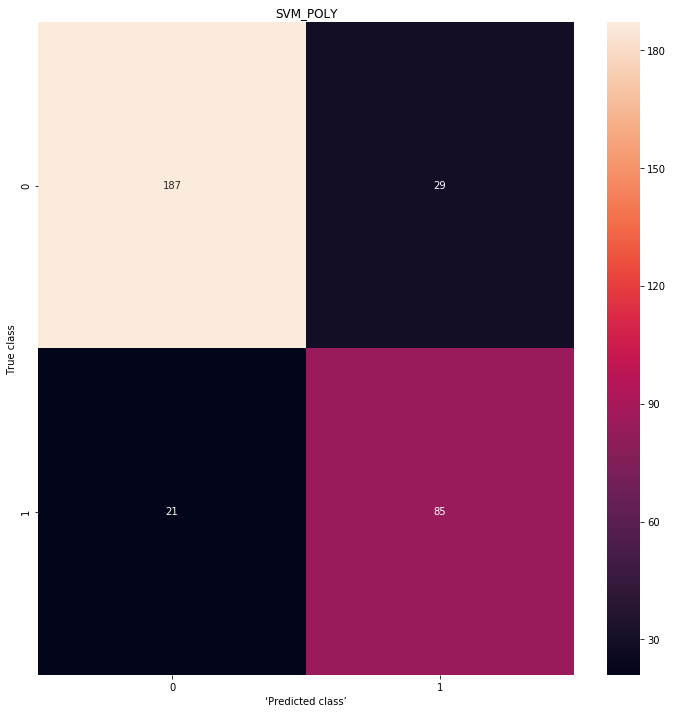

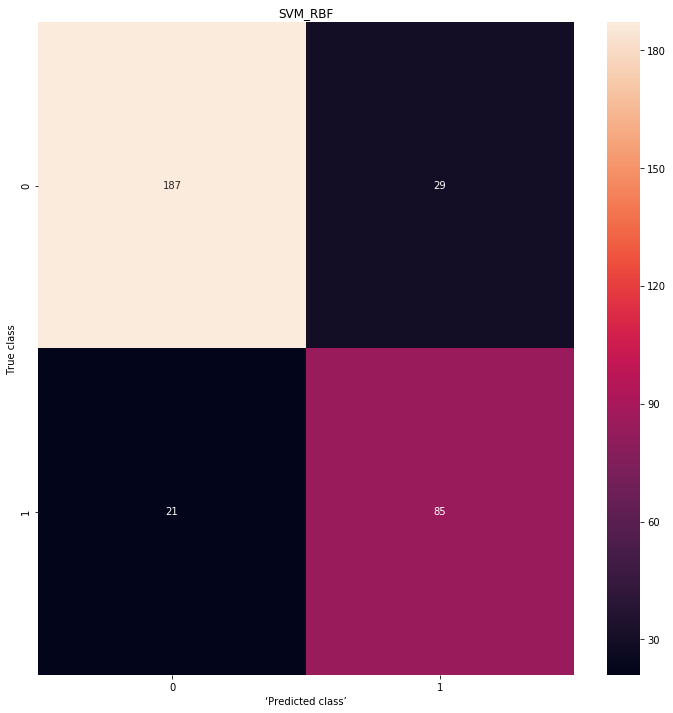

In [ ]:
for name, model in models:
    conf_matrix = confusion_matrix(Y_validation, y_pred)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix,annot=True, fmt="d");
    plt.title(name)
    plt.ylabel("True class")
    plt.xlabel("‘Predicted class’")
    plt.show()


### undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
os =  RandomUnderSampler(sampling_strategy='majority')
X_new, y_new = os.fit_sample(X_train, Y_train)


In [ ]:
num_folds = 10
seed = 7
scoring = 'f1'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC(probability=True)))
models.append(('SVM_LIN', SVC(kernel="linear", probability=True)))
models.append(('SVM_POLY', SVC(kernel="poly",probability=True)))
models.append(('SVM_RBF', SVC(kernel="rbf",probability=True)))
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
	cv_results = cross_val_score(model, X_new, np.ravel(y_new), cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)



LR: 0.802827 (0.055132)
LDA: 0.817145 (0.061693)
QDA: 0.556851 (0.122883)
KNN: 0.732530 (0.074589)
CART: 0.774232 (0.051760)
RF: 0.828370 (0.045095)
NB: 0.435742 (0.142422)
SVM_LIN: 0.821745 (0.059603)
SVM_POLY: 0.819839 (0.049383)
SVM_RBF: 0.809092 (0.065599)


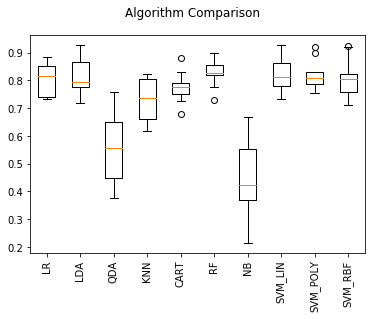

In [ ]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=90)
plt.show()

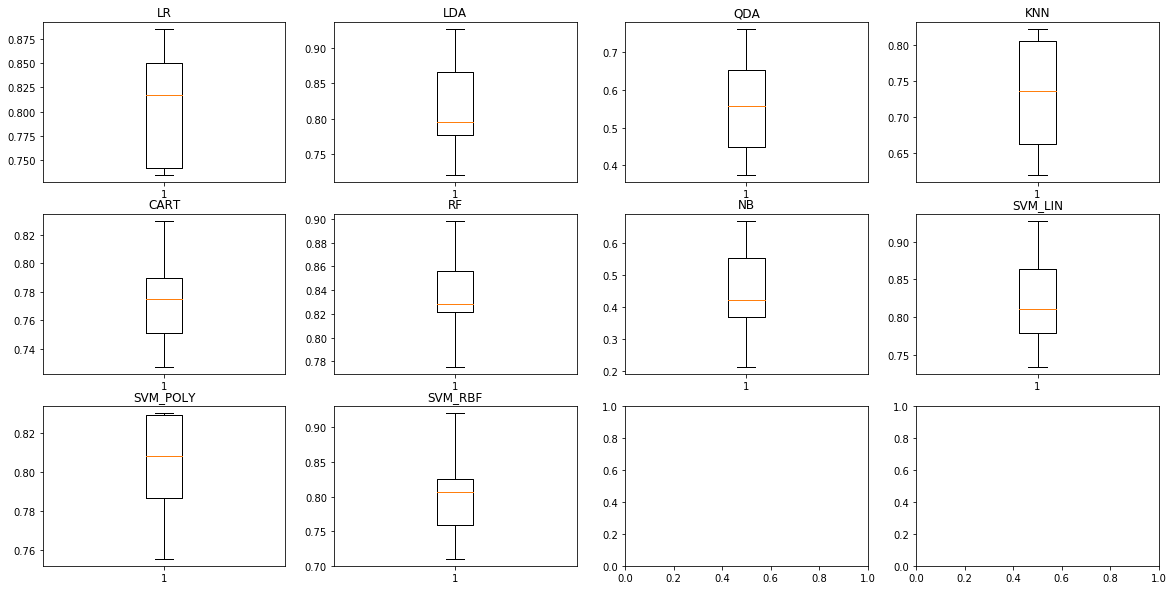

In [ ]:
NB_COL = 4
NB_LIG = 3
fig, axs = plt.subplots(NB_LIG, NB_COL, figsize=(20, 10))
for i in range(len(results)):
    axs[i//NB_COL, i%NB_COL].boxplot(results[i], showfliers=False)
    axs[i//NB_COL, i%NB_COL].set_title(names[i])

In [ ]:
for name, model in models:
    model.fit(X_new, y_new)
    y_pred = model.predict(X_validation)
    pred_prob = model.predict_proba(X_validation)
    precision, recall, thresholds = precision_recall_curve(Y_validation, pred_prob[:,1])
    print(name," :",accuracy_score(Y_validation, y_pred)," ",f1_score(Y_validation, y_pred, average='macro')," ",auc(recall, precision))


LR  : 0.8385093167701864   0.8234649122807016   0.8115166694669564
LDA  : 0.8571428571428571   0.8374807987711214   0.8371228713074074
QDA  : 0.7546583850931677   0.6518156558398007   0.7523741128820535
KNN  : 0.7639751552795031   0.7340578135188003   0.7000016110265486
CART  : 0.7701863354037267   0.7467261904761906   0.7197068410378848
RF  : 0.8571428571428571   0.8461698238617481   0.8876319604792973
NB  : 0.7701863354037267   0.6813756953359007   0.7653708936304244
SVM_LIN  : 0.8385093167701864   0.8212715084753   0.8345536639418575
SVM_POLY  : 0.8540372670807453   0.8351469995533916   0.8404476061214745
SVM_RBF  : 0.8509316770186336   0.8320365138013476   0.8255939020261415


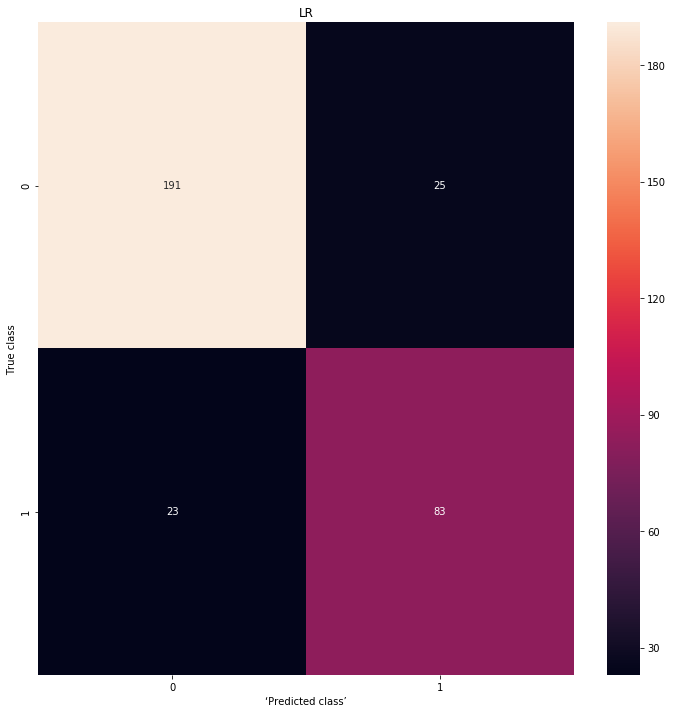

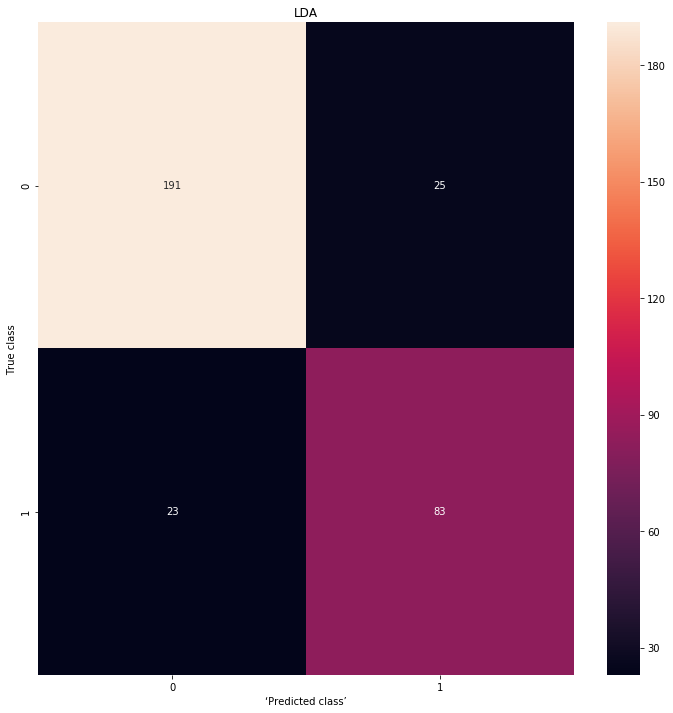

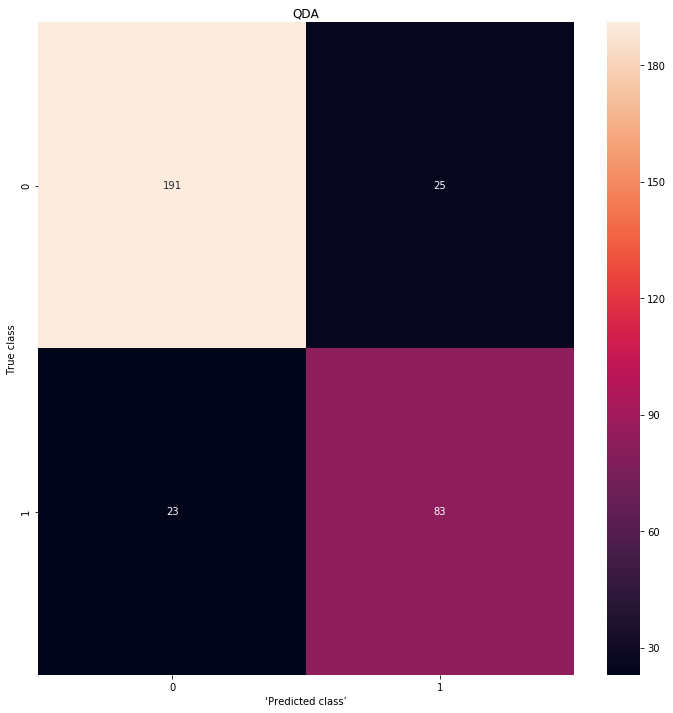

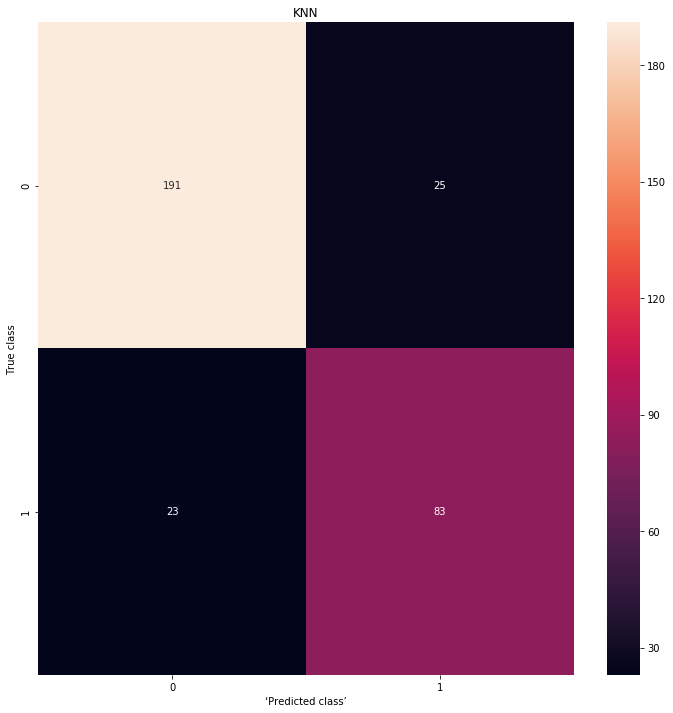

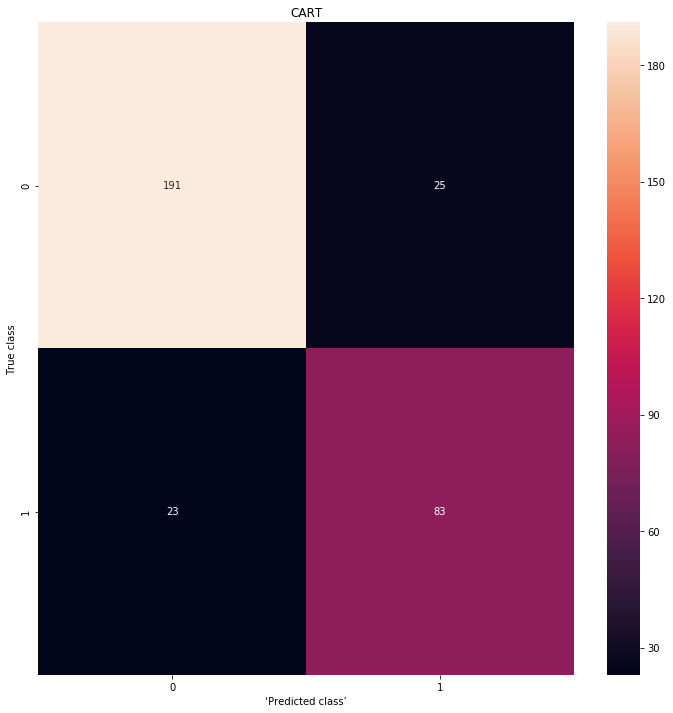

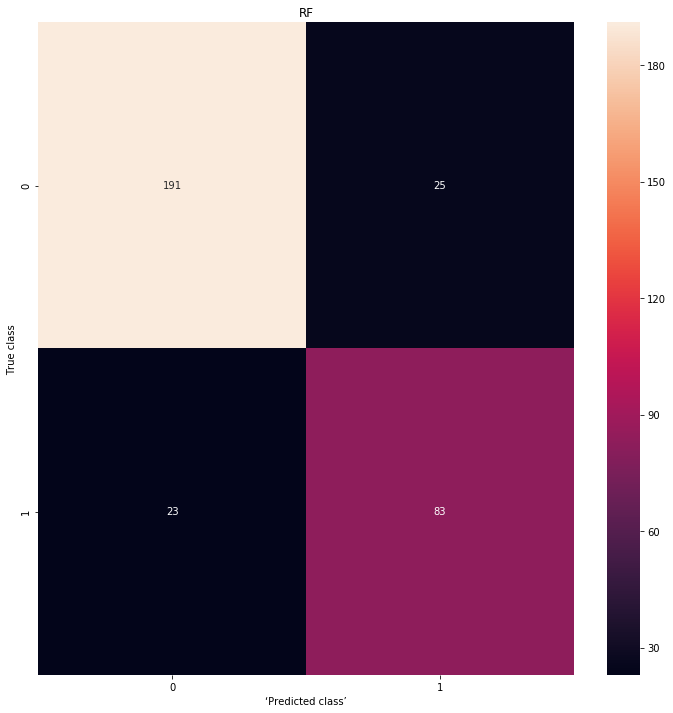

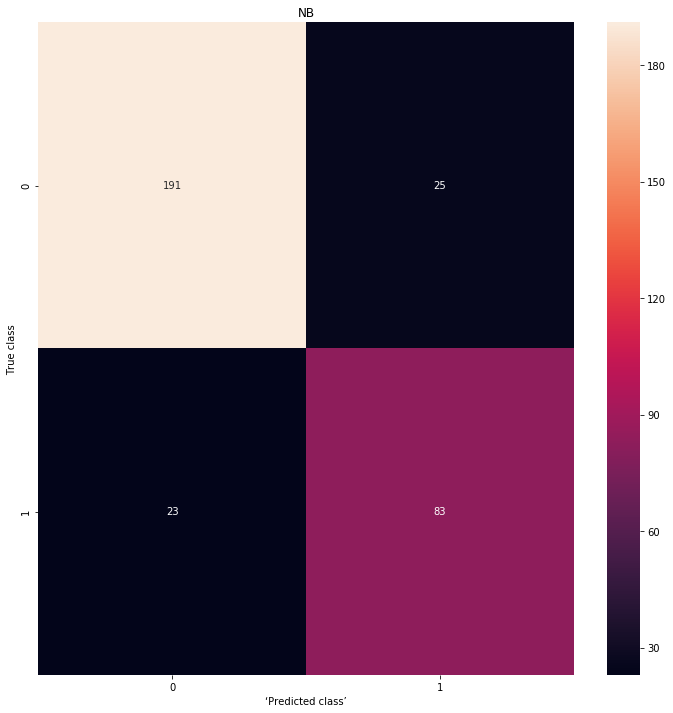

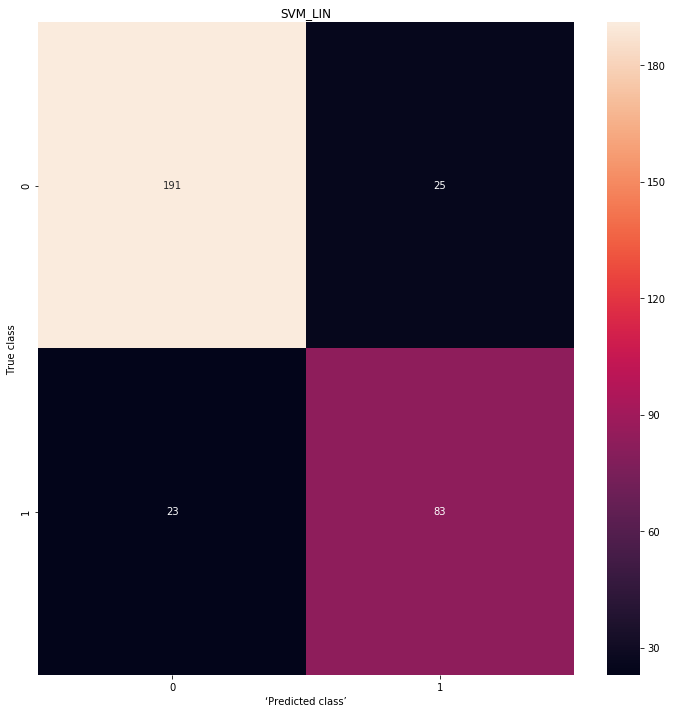

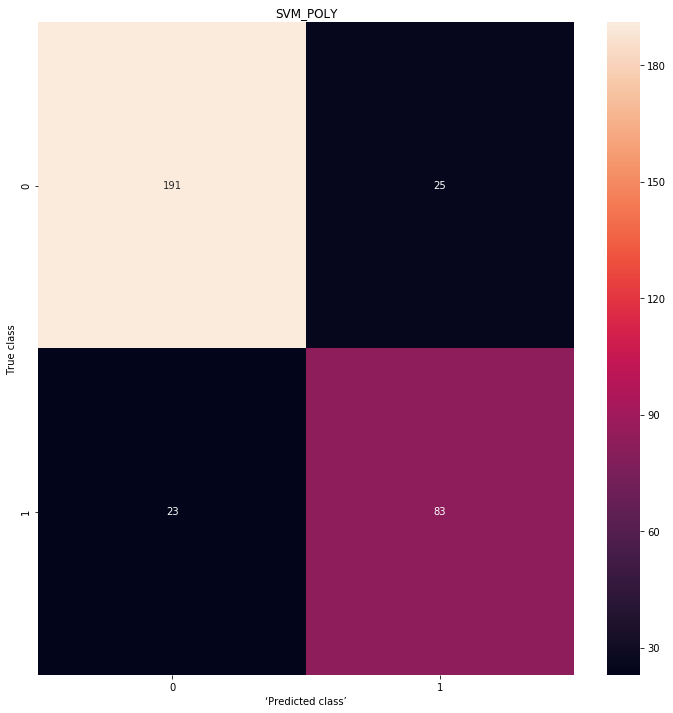

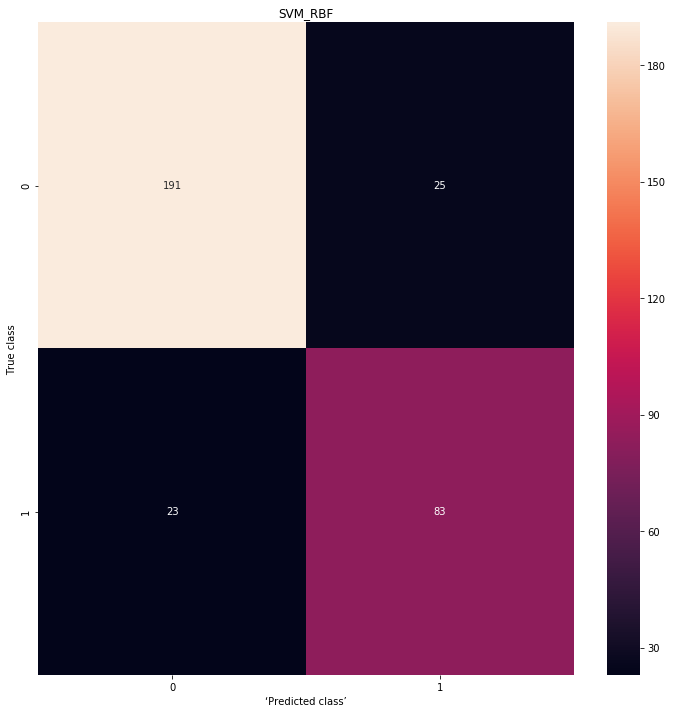

In [ ]:
for name, model in models:
    conf_matrix = confusion_matrix(Y_validation, y_pred)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix,annot=True, fmt="d");
    plt.title(name)
    plt.ylabel("True class")
    plt.xlabel("‘Predicted class’")
    plt.show()

### Analyse

In [ ]:
df.describe()

,ptvente,age,anciente,nbimpaye,mtrejet,nbopguic,moycred3,aveparmo,endette,engagemt,engagemc,engagemm,nbcptvue,moysold3,moycredi,nbop,mtfactur,engageml,nbvie,mtvie,nbeparmo,mteparmo,nbeparlo,mteparlo,nblivret,mtlivret,nbeparlt,mteparlt,nbeparte,mteparte,nbbon,mtbon,nbcb,nbcbptar,avtscpte,aveparfi,sexer,nbjdebit
count,1073.000000,1073.000000,1073.000000,1073.0,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000
mean,0.110593,0.521961,0.179652,0.0,0.998575,0.053754,0.002433,0.059020,0.055118,0.022263,0.008384,0.012501,0.256990,0.258834,0.006351,0.110683,0.017558,0.015229,0.018424,0.006590,0.163715,0.003867,0.163094,0.055528,0.189655,0.021381,0.009786,0.007730,0.002796,0.000932,0.000932,0.000932,0.213979,0.034017,0.007394,0.007178,0.377446,0.090185
std,0.180945,0.253301,0.179592,0.0,0.030958,0.099903,0.030782,0.119883,0.124542,0.070535,0.043635,0.045997,0.124804,0.077016,0.032607,0.103039,0.058640,0.063806,0.060606,0.051224,0.142753,0.031017,0.199015,0.129288,0.196827,0.062665,0.049694,0.059195,0.052827,0.030528,0.030528,0.030528,0.173609,0.094796,0.037156,0.048110,0.484974,0.174146
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.319149,0.050633,0.0,1.000000,0.000000,0.000153,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.225999,0.000490,0.022901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000160,0.000000,0.000000,0.000000
50%,0.000000,0.531915,0.155351,0.0,1.000000,0.035714,0.000613,0.006203,0.000000,0.000000,0.000000,0.000000,0.250000,0.238623,0.002697,0.095420,0.000000,0.000000,0.000000,0.000000,0.111111,0.000308,0.000000,0.000000,0.250000,0.000131,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.001208,0.000000,0.000000,0.000000
75%,0.166667,0.723404,0.247411,0.0,1.000000,0.071429,0.001379,0.059606,0.060606,0.010057,0.000000,0.000000,0.250000,0.259987,0.005884,0.164122,0.002629,0.000000,0.000000,0.000000,0.222222,0.002993,0.250000,0.041156,0.250000,0.016025,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.005782,0.000071,1.000000,0.074627
max,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.isin(["."]).sum()
# count the number of NaN values in each column

ptvente     0
age         0
anciente    0
nbimpaye    0
mtrejet     0
nbopguic    0
moycred3    0
aveparmo    0
endette     0
engagemt    0
engagemc    0
engagemm    0
nbcptvue    0
moysold3    0
moycredi    0
nbop        0
mtfactur    0
engageml    0
nbvie       0
mtvie       0
nbeparmo    0
mteparmo    0
nbeparlo    0
mteparlo    0
nblivret    0
mtlivret    0
nbeparlt    0
mteparlt    0
nbeparte    0
mteparte    0
nbbon       0
mtbon       0
nbcb        0
nbcbptar    0
avtscpte    0
aveparfi    0
sexer       0
nbjdebit    0
dtype: int64

In [ ]:
df.isna().sum()

ptvente     0
age         0
anciente    0
nbimpaye    0
mtrejet     0
nbopguic    0
moycred3    0
aveparmo    0
endette     0
engagemt    0
engagemc    0
engagemm    0
nbcptvue    0
moysold3    0
moycredi    0
nbop        0
mtfactur    0
engageml    0
nbvie       0
mtvie       0
nbeparmo    0
mteparmo    0
nbeparlo    0
mteparlo    0
nblivret    0
mtlivret    0
nbeparlt    0
mteparlt    0
nbeparte    0
mteparte    0
nbbon       0
mtbon       0
nbcb        0
nbcbptar    0
avtscpte    0
aveparfi    0
sexer       0
nbjdebit    0
dtype: int64

In [ ]:
df

,ptvente,age,anciente,nbimpaye,mtrejet,nbopguic,moycred3,aveparmo,endette,engagemt,engagemc,engagemm,nbcptvue,moysold3,moycredi,nbop,mtfactur,engageml,nbvie,mtvie,nbeparmo,mteparmo,nbeparlo,mteparlo,nblivret,mtlivret,nbeparlt,mteparlt,nbeparte,mteparte,nbbon,mtbon,nbcb,nbcbptar,avtscpte,aveparfi,sexer,nbjdebit
0,0.000000,0.702128,0.272727,0.0,1.0,0.000000,0.005874,0.723648,0.040404,0.034327,0.0000,0.073670,0.50,0.339839,0.027948,0.187023,0.154721,0.0,0.076923,0.027989,0.444444,0.035980,0.50,0.897416,0.50,0.187416,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.00,0.065657,0.078817,0.0,0.007463
1,0.833333,0.723404,0.309551,0.0,1.0,0.142857,1.000000,0.009196,0.000000,0.000000,0.0000,0.000000,0.25,0.649352,1.000000,0.190840,0.073975,0.0,0.000000,0.000000,0.333333,1.000000,0.50,0.015390,0.00,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.4,0.00,1.000000,0.018948,0.0,0.000000
2,0.000000,0.851064,0.158803,0.0,1.0,0.000000,0.002043,0.003507,0.000000,0.000000,0.0000,0.000000,0.25,0.228892,0.009806,0.007634,0.002549,0.0,0.000000,0.000000,0.111111,0.000174,0.00,0.000000,0.25,0.003507,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.00,0.006182,0.000000,0.0,0.000000
3,0.000000,0.191489,0.112773,0.0,1.0,0.000000,0.000868,0.078681,0.000000,0.000000,0.0000,0.000000,0.25,0.263793,0.004168,0.087786,0.000000,0.0,0.000000,0.000000,0.333333,0.003912,0.25,0.079903,0.50,0.030937,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.00,0.004191,0.000000,0.0,0.000000
4,0.000000,0.659574,0.101266,0.0,1.0,0.000000,0.019102,0.487990,0.000000,0.060197,0.0756,0.105796,0.25,0.292542,0.050993,0.187023,0.000000,0.0,0.076923,0.003931,0.555556,0.024263,0.75,0.690126,0.50,0.075620,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.25,0.024918,0.003032,0.0,0.111940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,0.000000,0.425532,0.025316,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00,0.224608,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.111111,0.000000,0.25,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.000000,1.0,0.000000
1069,0.000000,0.531915,0.029919,0.0,1.0,0.000000,0.000000,0.011015,0.000000,0.000000,0.0000,0.000000,0.00,0.224608,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.111111,0.000548,0.25,0.018435,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000538,0.000000,1.0,0.000000
1070,0.000000,0.659574,0.034522,0.0,1.0,0.142857,0.000715,0.057572,0.000000,0.000000,0.0000,0.000000,0.25,0.233300,0.003432,0.194656,0.010439,0.0,0.000000,0.000000,0.111111,0.002863,0.25,0.096350,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.00,0.003190,0.000000,1.0,0.067164
1071,0.333333,0.191489,0.219793,0.0,1.0,0.071429,0.000409,0.025404,0.000000,0.000000,0.0000,0.000000,0.25,0.229809,0.001961,0.095420,0.016522,0.0,0.000000,0.000000,0.111111,0.001263,0.25,0.042515,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.00,0.001405,0.000000,1.0,0.283582


In [ ]:
df.mean()

ptvente     0.110593
age         0.521961
anciente    0.179652
nbimpaye    0.000000
mtrejet     0.998575
nbopguic    0.053754
moycred3    0.002433
aveparmo    0.059020
endette     0.055118
engagemt    0.022263
engagemc    0.008384
engagemm    0.012501
nbcptvue    0.256990
moysold3    0.258834
moycredi    0.006351
nbop        0.110683
mtfactur    0.017558
engageml    0.015229
nbvie       0.018424
mtvie       0.006590
nbeparmo    0.163715
mteparmo    0.003867
nbeparlo    0.163094
mteparlo    0.055528
nblivret    0.189655
mtlivret    0.021381
nbeparlt    0.009786
mteparlt    0.007730
nbeparte    0.002796
mteparte    0.000932
nbbon       0.000932
mtbon       0.000932
nbcb        0.213979
nbcbptar    0.034017
avtscpte    0.007394
aveparfi    0.007178
sexer       0.377446
nbjdebit    0.090185
dtype: float64

In [ ]:
df.count()

ptvente     1073
age         1073
anciente    1073
nbimpaye    1073
mtrejet     1073
nbopguic    1073
moycred3    1073
aveparmo    1073
endette     1073
engagemt    1073
engagemc    1073
engagemm    1073
nbcptvue    1073
moysold3    1073
moycredi    1073
nbop        1073
mtfactur    1073
engageml    1073
nbvie       1073
mtvie       1073
nbeparmo    1073
mteparmo    1073
nbeparlo    1073
mteparlo    1073
nblivret    1073
mtlivret    1073
nbeparlt    1073
mteparlt    1073
nbeparte    1073
mteparte    1073
nbbon       1073
mtbon       1073
nbcb        1073
nbcbptar    1073
avtscpte    1073
aveparfi    1073
sexer       1073
nbjdebit    1073
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073 entries, 0 to 1072
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ptvente   1073 non-null   float64
 1   age       1073 non-null   float64
 2   anciente  1073 non-null   float64
 3   nbimpaye  1073 non-null   float64
 4   mtrejet   1073 non-null   float64
 5   nbopguic  1073 non-null   float64
 6   moycred3  1073 non-null   float64
 7   aveparmo  1073 non-null   float64
 8   endette   1073 non-null   float64
 9   engagemt  1073 non-null   float64
 10  engagemc  1073 non-null   float64
 11  engagemm  1073 non-null   float64
 12  nbcptvue  1073 non-null   float64
 13  moysold3  1073 non-null   float64
 14  moycredi  1073 non-null   float64
 15  nbop      1073 non-null   float64
 16  mtfactur  1073 non-null   float64
 17  engageml  1073 non-null   float64
 18  nbvie     1073 non-null   float64
 19  mtvie     1073 non-null   float64
 20  nbeparmo  1073 non-null   floa

In [ ]:
list(df.columns)

['ptvente',
 'age',
 'anciente',
 'nbimpaye',
 'mtrejet',
 'nbopguic',
 'moycred3',
 'aveparmo',
 'endette',
 'engagemt',
 'engagemc',
 'engagemm',
 'nbcptvue',
 'moysold3',
 'moycredi',
 'nbop',
 'mtfactur',
 'engageml',
 'nbvie',
 'mtvie',
 'nbeparmo',
 'mteparmo',
 'nbeparlo',
 'mteparlo',
 'nblivret',
 'mtlivret',
 'nbeparlt',
 'mteparlt',
 'nbeparte',
 'mteparte',
 'nbbon',
 'mtbon',
 'nbcb',
 'nbcbptar',
 'avtscpte',
 'aveparfi',
 'sexer',
 'nbjdebit']

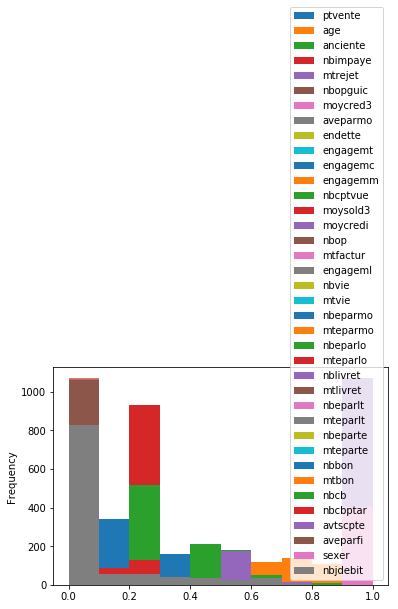

In [ ]:
df.plot.hist()

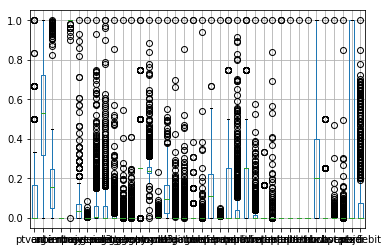

In [ ]:
df.boxplot()

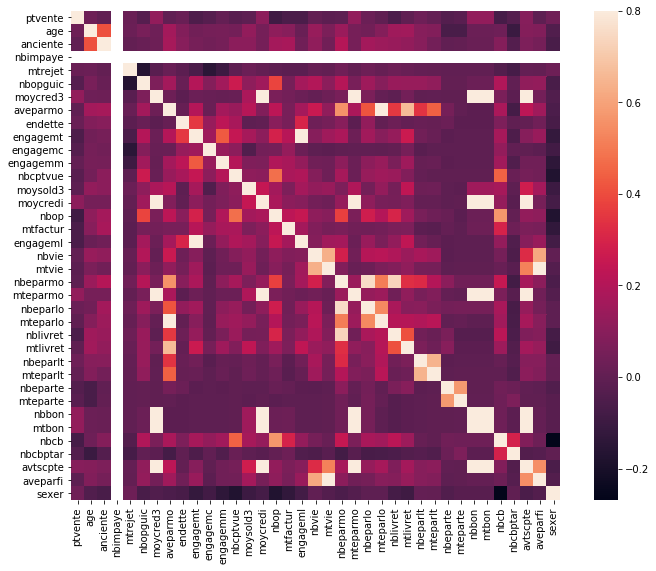

In [ ]:
corrmat=X.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [ ]:
df.groupby("cartevp").agg([np.mean, np.median, np.min, np.max])

matricul                             ptvente                   \
                 mean   median    amin     amax      mean median amin amax   
cartevp                                                                      
Cnon     2.445752e+06  1950847  113333  7589439  1.705882      1    1    7   
Coui     2.575932e+06  1945121  123126  7573846  1.579387      1    1    7   

               age                     anciente                  nbimpaye  \
              mean median amin amax        mean median amin amax     mean   
cartevp                                                                     
Cnon     41.509804     42   18   65  153.922969    136    1  860        0   
Coui     44.565460     45   24   65  163.470752    135    1  870        0   

                           mtrejet                   nbopguic              \
        median amin amax      mean median amin amax      mean median amin   
cartevp                                                                     
Cnon         0    0    0 -0.029412      0   -5    0  0.973389      0    0   
Coui         0    0    0 -0.158774      0  -51    0  2.562674      1    0   

                moycred3                         aveparmo                \
        amax        mean median amin   amax          mean   median amin   
cartevp                                                                   
Cnon      15   12.831933      8    0    326  38596.952381   2408.5    0   
Coui      28  116.827298     31    0  19579  94345.459610  22983.0    0   

                  endette                        engagemt              \
           amax      mean median amin amax           mean median amin   
cartevp                                                                 
Cnon     901767  4.775910      0    0   95   35317.690476      0    0   
Coui     970000  6.810585      0    0   99  160846.033426  11453    0   

                     engagemc                          engagemm              \
            amax         mean median amin    amax          mean median amin   
cartevp                                                                       
Cnon     2966630  1406.827731      0    0   75960   7851.296919      0    0   
Coui     3472938  9751.208914      0    0  500780  44849.607242      0    0   

                  nbcptvue                       moysold3                 \
            amax      mean median amin amax          mean  median   amin   
cartevp                                                                    
Cnon      333048  0.922969      1    0    4   7155.254902  3001.5 -67074   
Coui     1618242  1.236769      1    0    4  17673.077994  9159.0 -70050   

                  moycredi                         nbop                   \
           amax       mean median amin  amax       mean median amin amax   
cartevp                                                                    
Cnon     241827  11.065826      7    0   289  23.599440     21    0  100   
Coui     192261  55.423398     26    0  4079  39.738162     36    0  262   

             mtfactur                            engageml              \
                 mean median amin     amax           mean median amin   
cartevp                                                                 
Cnon      8403.981793      0    0   290530   26059.565826      0    0   
Coui     53163.000000      0    0  1331530  106245.217270      0    0   

                     nbvie                          mtvie              \
            amax      mean median amin amax          mean median amin   
cartevp                                                                 
Cnon     2966630  0.183473      0    0   13  21348.128852      0    0   
Coui     3472938  0.350975      0    0   13  64885.579387      0    0   

                  nbeparmo                        mteparmo                \
            amax      mean median amin amax           mean   median amin   
cartevp                                                           